In [70]:
%matplotlib inline
import matplotlib.pyplot as pl
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
import seaborn as sns

import numpy as np
import pandas as pd
from tqdm import tqdm

from scipy.stats import binom, poisson

# A few useful constants
KEPLER_BEGIN_BK, KEPLER_END_BK = 130, 1582

In [71]:
rates = pd.read_hdf('transit-rate-by-skygroup.h5', key='rate')
rates.head()

n_transits  n_tces      n_days  transits_per_day  channel
skygroup season                                                           
1        0               92      54  369.398637          0.249053       81
         1               92      61  373.424100          0.246369       29
         2               80      53  325.282400          0.245940        1
         3               94      61  347.636795          0.270397       53
2        0               88      49  369.398637          0.238225       82

In [78]:
THRESHOLDS = {'least_agressive': 1e-4,
              'less_agressive': 1e-3,
              'more_agressive': 5e-3,
              'most_agressive': 1e-2}

#agressivity = 'least-agressive'

for agressivity in THRESHOLDS.keys():

    PROBABILITY_THRESHOLD = THRESHOLDS[agressivity]

    tce_expect_col = []
    rate_expected_col, rate_threshold_col = [], []
    transit_rate_expected_half_col, transit_rate_threshold_half_col = [], []
    transit_rate_expected_quart_col, transit_rate_threshold_quart_col = [], []

    for skygroup, season in rates.index:
        mask_reference = ((rates.index.get_level_values('skygroup') == skygroup)
                          & (rates.index.get_level_values('season') != season)
                          & ~rates.channel.isin([26, 44, 58]))
        rates[mask_reference]
        n_tces_expected = rates[mask_reference].n_tces.mean()
        transits_per_day_expected = rates[mask_reference].transits_per_day.mean()
        p_transit_expected = transits_per_day_expected / n_tces_expected
        tce_expect_col.append(n_tces_expected)
        rate_expected_col.append(transits_per_day_expected)
        rate_threshold_col.append(int(binom.ppf(1 - PROBABILITY_THRESHOLD,
                                                int(n_tces_expected),
                                                p_transit_expected)))

        transits_per_half_day_expected = rates[mask_reference].transits_per_day.mean() / 2.
        p_transit_expected = transits_per_half_day_expected / n_tces_expected
        transit_rate_expected_half_col.append(transits_per_half_day_expected)
        transit_rate_threshold_half_col.append(int(binom.ppf(1 - PROBABILITY_THRESHOLD,
                                                             int(n_tces_expected),
                                                             p_transit_expected)))

        transits_per_quart_day_expected = rates[mask_reference].transits_per_day.mean() / 4.
        p_transit_expected = transits_per_quart_day_expected / n_tces_expected
        transit_rate_expected_quart_col.append(transits_per_quart_day_expected)
        transit_rate_threshold_quart_col.append(int(binom.ppf(1 - PROBABILITY_THRESHOLD,
                                                             int(n_tces_expected),
                                                             p_transit_expected)))

    rates['n_tces_expected'] = tce_expect_col
    rates['transit_rate_expected'] = rate_expected_col
    rates['transit_rate_threshold'] = rate_threshold_col
    rates['transit_rate_expected_half'] = transit_rate_expected_half_col
    rates['transit_rate_threshold_half'] = transit_rate_threshold_half_col
    rates['transit_rate_expected_quart'] = transit_rate_expected_quart_col
    rates['transit_rate_threshold_quart'] = transit_rate_threshold_quart_col

    rates.to_hdf('transit-rate-by-skygroup-with-threshold-{}.h5'.format(agressivity), key='rate')

In [73]:
rates

n_transits  n_tces      n_days  transits_per_day  channel  \
skygroup season                                                              
1        0               92      54  369.398637          0.249053       81   
         1               92      61  373.424100          0.246369       29   
         2               80      53  325.282400          0.245940        1   
         3               94      61  347.636795          0.270397       53   
2        0               88      49  369.398637          0.238225       82   
         1              135      67  373.424100          0.361519       30   
         2              117      60  325.282400          0.359687        2   
         3               80      48  347.636795          0.230125       54   
3        0               46      33  369.398637          0.124527       83   
         1               41      29  373.424100          0.109795       31   
         2               48      34  325.282400          0.147564        3   
         3               54      38  347.636795          0.155335       55   
4        0              150      84  369.398637          0.406065       84   
         1              124      71  373.424100          0.332062       32   
         2              111      72  325.282400          0.341242        4   
         3              134      80  347.636795          0.385460       56   
5        0              121      58  369.398637          0.327559       77   
         1              107      58  373.424100          0.286537       49   
         2               16      16  325.282400          0.049188        5   
         3               94      54  347.636795          0.270397       33   
6        0               62      32  369.398637          0.167840       78   
         1               74      34  373.424100          0.198166       50   
         2               18      18  325.282400          0.055337        6   
         3               43      26  347.636795          0.123692       34   
7        0              146      69  369.398637          0.395237       79   
         1              131      64  373.424100          0.350808       51   
         2               17      17  325.282400          0.052262        7   
         3              115      66  347.636795          0.330805       35   
8        0               81      50  369.398637          0.219275       80   
         1               89      49  373.424100          0.238335       52   
...                     ...     ...         ...               ...      ...   
77       2              180     103  325.282400          0.553365       77   
         3              175     101  347.636795          0.503399       49   
78       0               52      52  369.398637          0.140769        6   
         1              242     113  373.424100          0.648057       34   
         2              178     102  325.282400          0.547217       78   
         3              214     110  347.636795          0.615585       50   
79       0               60      60  369.398637          0.162426        7   
         1              283     136  373.424100          0.757851       35   
         2              196     120  325.282400          0.602553       79   
         3              247     131  347.636795          0.710512       51   
80       0               76      76  369.398637          0.205740        8   
         1              280     149  373.424100          0.749818       36   
         2              232     139  325.282400          0.713226       80   
         3              285     154  347.636795          0.819821       52   
81       0              214     122  369.398637          0.579320        1   
         1              221     122  373.424100          0.591820       53   
         2              178     103  325.282400          0.547217       81   
         3              209     116  347.636795          0.601202       29   
82       0              207     113  36

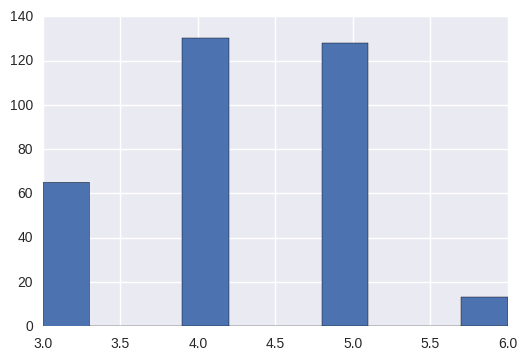

In [186]:
rates.transit_rate_threshold.hist()